<a href="https://colab.research.google.com/github/AhmetA75/Capstone_Project-TS-Analysis-/blob/master/CAPSTONE_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                           PREDICTIVE MAINTENANCE WITH 

                          TIME SERIES ANALIYSIS APPROACH 

                            USING NASA BEARING DATASET





                                   AHMET AKÇAY

               
                           CEV-BEBKA VERİ BİLİMİ EĞİTİMİ  

                        
                                  DECEMBER 2022





















                                    SUMMARY

  This project about predictive maintenance. I used continous supervised learning with a time series model (Prophet) in docker envrioment all of model and folders containerized and mobilized. For communication of each work file held by kafka. I used real-time visualization and real-time alarm, anomaly database with pgadmin in docker. I also used que-visualizer as kafdrop for better explainability. Our accuracy is explained by depending mechanical design theories (safe life span of a bearing) and visualized explainability for last demonstration.



                                  MOTIVATION
                                  

The reason of choosing this project depending indutrial reasons and depending my Marine engineering experiences.Standart sensor based warning and protective systems only working direct data sending and no future or trend warnings. For example standart thermometer or vibration (accelerometer) sensor based systems only sends data when it's read. Sometimes it is too late for making action or maintenance if it's anormal or dangerous value system already damaged and needs to replace or repair some parts. As a result standart systems without prewarning or ML based predictive models maintenace or service cost will be higher and addition to that you lose extra time for this.With my model predicts future values of system and produces different types of warnings and anomalies thanks to this responsable enginner can check faulty system in advance.

                                LITERETURE REVIEW

Due to its importance in the industry, vibration-based diagnosis and prognosis of rolling element bearings (REB) attract more and more attention from the research community. Moreover, it is now possible to test newly developed methods on test rig data that are open-access. The NASA provides a list of data bases concerning prognosis and some REB data-sets, such as the one from the Center for Intelligent Maintenance Systems(1)  (IMS), University of Cincinnati. This data-set has so far been used by many authors. However, even if the state of health of the tested bearings is clearly provided and sometimes supported by photographs taken at the end of endurance, the diagnosis from the provided vibration signals is not so obvious.  
In order to fulfill this objective, several diagnostic techniques are used: time analysis, spectral analysis, blind deconvolution, spectral coherence, envelope spectrum. A diagnosis is therefore returned whenever possible, together with recommendations for prognosis in those cases which have been identified as difficult. 
Four bearings were installed on a shaft. The rotation speed was kept constant at 2000 RPM by an AC motor coupled to the shaft via rub belts. A radial load of 6000 lbs is applied onto the shaft and bearing by a spring mechanism. All bearings are force lubricated.

                                      NOTE
    

In  report all of code spaces visualizations and datasets only for demonstration purpose. This project only work with together in docker envrioment.

                                CODE AND DATA

In [ ]:
import pandas as pd
RMS = pd.read_csv('RMS.csv')
RMS

,datetime,bearing_1,bearing_2,bearing_3,bearing_4
0,2004-02-12 10:32:39,0.074180,0.090945,0.109403,0.054105
1,2004-02-12 10:42:39,0.075382,0.093417,0.109815,0.056102
2,2004-02-12 10:52:39,0.076228,0.093720,0.109864,0.056146
3,2004-02-12 11:02:39,0.078726,0.092949,0.110662,0.056808
4,2004-02-12 11:12:39,0.078475,0.095350,0.107507,0.056841
...,...,...,...,...,...
979,2004-02-19 05:42:39,0.725019,0.218299,0.170574,0.148355
980,2004-02-19 05:52:39,0.462021,0.170820,0.177875,0.116632
981,2004-02-19 06:02:39,0.483847,0.193646,0.187409,0.130585
982,2004-02-19 06:12:39,0.002103,0.004018,0.003950,0.002154


In this above table we can see that our time labeled raw data converted rms values for better processing

In [ ]:
from matplotlib import pyplot as plt

Visualization of all bearings rms values for understanding about our purpose and
dataset

In [ ]:
df = pd.read_csv("RMS.csv")
data = df["bearing_1"].tolist()
data2 = df["bearing_2"].tolist()
data3 = df["bearing_3"].tolist()
data4 = df["bearing_4"].tolist()

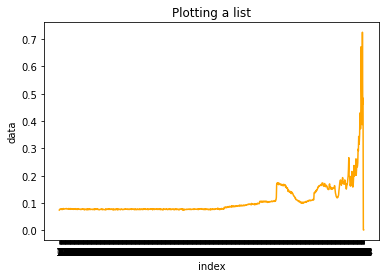

In [ ]:
plt.plot(data, color='orange') #plot the data
plt.xticks(range(0,len(data)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('data') #set the label for y axis
plt.xlabel('index') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

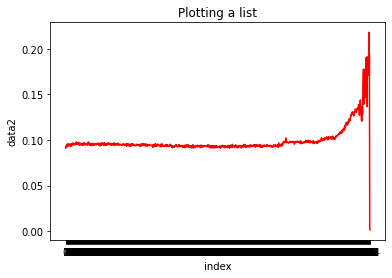

In [ ]:
plt.plot(data2, color='red') #plot the data
plt.xticks(range(0,len(data2)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('data2') #set the label for y axis
plt.xlabel('index') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

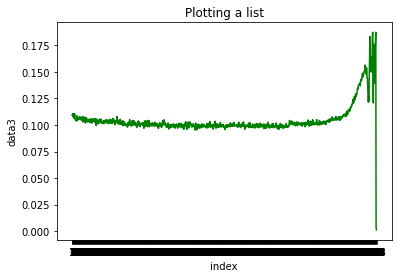

In [ ]:
plt.plot(data3, color='green') #plot the data
plt.xticks(range(0,len(data3)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('data3') #set the label for y axis
plt.xlabel('index') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

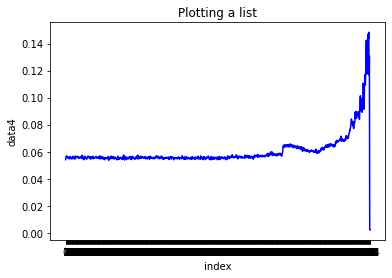

In [ ]:
plt.plot(data4, color='blue') #plot the data
plt.xticks(range(0,len(data4)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('data4') #set the label for y axis
plt.xlabel('index') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

Docker file (.yml) for building and communicating our codes and envrioments we need docker containers

In [ ]:
version: '3.7'

services:

  ai-module:
    container_name: "ai-module"
    image: "akcay-ai-image"
    build:
      context: ./process
    env_file:
      - .env
    restart: on-failure
    depends_on:
      - "queue"
      - "postgres-server"
    privileged: true    # Giving authoritiy to rule other containers (ai module)
    volumes:
#      - ./process/prediction_results:/app/prediction_results
      - ./data/all.csv:/app/data/all.csv

  akcay-graph-visualizer: # Real time visualizer (test-train prediction data)
    container_name: "akcay-graph-visualizer"
    image: "akcay-graph-visualizer-image"
    build:
      context: ./visualizer
    restart: on-failure
    ports:
      - "7755:7755"
    depends_on:
      - "ai-module"
    privileged: true
    volumes:
#      - ./process/prediction_results:/app/prediction_results
      - ./data/all.csv:/app/data/all.csv

  queue-visualizer:   # in locallhost for monitoring our kafka queue 
    image: obsidiandynamics/kafdrop
    container_name: queue-visualizer
    restart: on-failure
    ports:
      - "9000:9000"
    environment:
      KAFKA_BROKERCONNECT: "queue:29092"
      JVM_OPTS: "-Xms16M -Xmx48M -Xss180K -XX:-TieredCompilation -XX:+UseStringDeduplication -noverify"
    depends_on:
      - "queue"

  queue:
    container_name: queue
    image: obsidiandynamics/kafka  # Kafka for communcating envrioment parts and codes
    restart: always
    volumes:
      - ./kafka-data:/var/lib/kafka
    ports:
      - "2181:2181"
      - "9092:9092"
    environment:
      KAFKA_LISTENERS: "INTERNAL://:29092,EXTERNAL://:9092"
      KAFKA_ADVERTISED_LISTENERS: "INTERNAL://queue:29092,EXTERNAL://127.0.0.1:9092"
      KAFKA_LISTENER_SECURITY_PROTOCOL_MAP: "INTERNAL:PLAINTEXT,EXTERNAL:PLAINTEXT"
      KAFKA_INTER_BROKER_LISTENER_NAME: "INTERNAL"
      KAFKA_ZOOKEEPER_SESSION_TIMEOUT: "6000"
      KAFKA_RESTART_ATTEMPTS: "10"
      KAFKA_RESTART_DELAY: "5"
      ZOOKEEPER_AUTOPURGE_PURGE_INTERVAL: "0"

  postgres-server:
    container_name: postgres_container  # postgres server for anomaly and alarm realtime database
    image: postgres
    environment:
      POSTGRES_USER: postgres
      POSTGRES_PASSWORD: admin
    volumes:
      - ./postgres_config/init.sql:/docker-entrypoint-initdb.d/init.sql
      - ./postgres-data:/var/lib/postgresql/data
    ports:
      - "5532:5432"
    restart: unless-stopped

  pgadmin:
    container_name: pgadmin_container
    image: dpage/pgadmin4
    environment:
      PGADMIN_DEFAULT_EMAIL: pgadmin4@pgadmin.org
      PGADMIN_DEFAULT_PASSWORD: admin
      PGADMIN_CONFIG_SERVER_MODE: "False"
    volumes:
      - ./postgres_config/servers.json:/pgadmin4/servers.json
      - ./postgres_config/pgpass:/pgpass
    ports:
      - "5533:80"
    depends_on:
      - postgres-server
    restart: unless-stopped

A kafka queue codepiece for test purpose a building model

In [ ]:
import os  # For using local PC folders and ordinary system
import json # Data structure for kafka makes asy and fast data transfers also using with encoding
from kafka import KafkaConsumer  #Kafka queue


KAFKA_HOST = os.environ.get("KAFKA_HOST", "localhost")
KAFKA_PORT = os.environ.get("KAFKA_PORT", "9092")
KAFKA_DATA_TOPIC = os.environ.get("KAFKA_DATA_TOPIC", "data_topic")

KAFKA_SERVER = f'{KAFKA_HOST}:{KAFKA_PORT}'
# , auto_offset_reset='earliest'

if __name__ == '__main__':

    # create consumer
    consumer = KafkaConsumer(KAFKA_DATA_TOPIC, bootstrap_servers=KAFKA_SERVER,
                             value_deserializer=lambda x: json.loads(x.decode('utf-8')))
    print(f'listening ==> {KAFKA_SERVER}')

    # consumer listens kafka topic
    for message in consumer:
        value = message.value
        print("GELDI")
        print(type(value))
        print(value)

    # close consumer
    consumer.close()

Our model works like a real time simulation system. For proving this simulation i made a sensor simulation code this code piece leads to simulati like a sensor sending accerrelation data among detected time periods

In [ ]:
import json
import os
import pandas as pd
from time import sleep
from kafka import KafkaProducer

FILE_PATH = "simulation_data"
SLEEP_TIME = 1  # in seconds

# kafka configs
KAFKA_HOST = os.environ.get("KAFKA_HOST", "localhost")
KAFKA_PORT = os.environ.get("KAFKA_PORT", "9092")
KAFKA_DATA_TOPIC = os.environ.get("KAFKA_DATA_TOPIC", "data_topic")


def simulate(folder_path=FILE_PATH, sleep_time=SLEEP_TIME, kafka_host=KAFKA_HOST, kafka_port=KAFKA_PORT,
             kafka_topic=KAFKA_DATA_TOPIC):
    # create producer
    KAFKA_SERVER = f'{kafka_host}:{kafka_port}'
    producer = KafkaProducer(bootstrap_servers=KAFKA_SERVER)

    # read raw data
    data_files = os.listdir(folder_path)
    data_files.sort()

    columns = ['bearing_1', 'bearing_2', 'bearing_3', 'bearing_4']

    for data_file in data_files:
        dataset = pd.read_csv(os.path.join(folder_path, data_file), sep='\t')
        dataset.columns = columns

        data_list = dataset['bearing_1'].tolist()
        file_date = pd.to_datetime(data_file, format='%Y.%m.%d.%H.%M.%S')
        file_date_str = file_date.strftime("%Y-%m-%d %H:%M:%S")

        message = {"date": file_date_str,
                   "raw_data": data_list}

        try:
            producer.send(kafka_topic, value=json.dumps(message).encode("utf-8"))
            producer.flush()
            print(f'{file_date} Bearing 1 sent..')
        except Exception as err:
            print(err)

        sleep(sleep_time)

    # close producer
    producer.close()


if __name__ == '__main__':
    # start simulation
    simulate()


In [ ]:
bearing1 = pd.read_csv('bearing1.csv')
bearing1 # I choosed number one among four of bearings 
# In time series models we can not use train test split like other ml models
# For making our train test parts i divided into two parts our bearing1 data first half is train and second half 
# is going to be test part

,ds,y
0,2004-02-12 10:32:39,0.074180
1,2004-02-12 10:42:39,0.075382
2,2004-02-12 10:52:39,0.076228
3,2004-02-12 11:02:39,0.078726
4,2004-02-12 11:12:39,0.078475
...,...,...
979,2004-02-19 05:42:39,0.725019
980,2004-02-19 05:52:39,0.462021
981,2004-02-19 06:02:39,0.483847
982,2004-02-19 06:12:39,0.002103


In [ ]:
train = pd.read_csv('train.csv')
train
# This is our first half  send to Model (prophet)

,ds,y
0,2004-02-12 10:32:39,0.074180
1,2004-02-12 10:42:39,0.075382
2,2004-02-12 10:52:39,0.076228
3,2004-02-12 11:02:39,0.078726
4,2004-02-12 11:12:39,0.078475
...,...,...
487,2004-02-15 19:42:39,0.075878
488,2004-02-15 19:52:39,0.078669
489,2004-02-15 20:02:39,0.074891
490,2004-02-15 20:12:39,0.075512


In this codepiece i training the model and making test predictions and also saving model weigts as json for sending docker container in the and predicted resutls writing a csv file

In [ ]:
import pandas as pd
from prophet import Prophet
from ops import save_model, make_prediction

INPUT_FILE = "data/train.csv"


if __name__ == '__main__':
    # read training data
    df = pd.read_csv(INPUT_FILE)

    # create and train model
    m = Prophet()
    m.fit(df)

    # save model weights
    save_model(model=m, save_path="weights/model_weights.json")
    # make prediction
    make_prediction(model=m, file_name="data/prediction.csv")


In [ ]:
predictions = pd.read_csv('prediction.csv')
predictions
# These yhat values coming from our model lower and upper ones shows max min limits and yhat is the predicted value

,ds,yhat,yhat_lower,yhat_upper
0,2004-02-15 20:32:39,0.076938,0.075717,0.078174
1,2004-02-15 20:42:39,0.076933,0.075720,0.078122
2,2004-02-15 20:52:39,0.076928,0.075650,0.078181
3,2004-02-15 21:02:39,0.076921,0.075756,0.078214
4,2004-02-15 21:12:39,0.076915,0.075714,0.078162
5,2004-02-15 21:22:39,0.076908,0.075620,0.078136


This is main.py file a code includes all of our code pieces i mentioned above. We dont forget main.py connect our files via docker envrioment like others

In [ ]:
import os
import json
from util import load_json, update_config, add_row_to_df, append_hourly_anomaly, initialize_all_csv, update_all_csv
from ops import load_model, make_prediction, train, is_anomaly, preprocess, write_alarm_to_db, is_type2_alarm
from kafka import KafkaConsumer
import psycopg2
# import pandas as pd

import logging.config

# disable 3rd libraries loggings
logging.config.dictConfig({
    'version': 1,
    'disable_existing_loggers': True,
})

# logging config
logging.basicConfig(format='%(levelname)s: %(asctime)s - %(message)s', level=logging.INFO)

INPUT_FILE = "bearing1_train_half.csv"

TRAIN_FILE = os.environ.get("TRAIN_FILE", "data/train.csv")
PREDICTION_FILE = os.environ.get("PREDICTION_FILE", "data/prediction.csv")
WEIGHT_FILE = os.environ.get("WEIGHT_FILE", "weights/model_weights.json")
CONFIG_FILE = os.environ.get("CONFIG_FILE", "config.json")
ANOMALY_COUNT_FILE = os.environ.get("ANOMALY_COUNT_FILE", "anomaly_count_list.json")
ALL_DATA_FILE = os.environ.get("ALL_DATA_FILE", "data/all.csv")

KAFKA_HOST = os.environ.get("KAFKA_HOST", "localhost")
KAFKA_PORT = os.environ.get("KAFKA_PORT", "9092")
KAFKA_DATA_TOPIC = os.environ.get("KAFKA_DATA_TOPIC", "data_topic")

POSTGRES_HOST = os.environ.get("POSTGRES_HOST", "localhost")
POSTGRES_PORT = os.environ.get("POSTGRES_PORT", "5532")
POSTGRES_DATABASE = os.environ.get("POSTGRES_DATABASE", "ai_db")
POSTGRES_USER = os.environ.get("POSTGRES_USER", "postgres")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD", "admin")

KAFKA_SERVER = f'{KAFKA_HOST}:{KAFKA_PORT}'

if __name__ == '__main__':

    # make an initial prediction
    model = load_model(load_path=WEIGHT_FILE)
    make_prediction(model=model)

    # initialize temporary df for visualization (contains hourly actual value)
    # temp_df = pd.DataFrame(columns=["ds", "y"])
    initialize_all_csv()

    # control connection errors
    try:
        # create consumer
        consumer = KafkaConsumer(KAFKA_DATA_TOPIC, bootstrap_servers=KAFKA_SERVER,
                                 value_deserializer=lambda x: json.loads(x.decode('utf-8')))
        # database connection
        database_conn = psycopg2.connect(user=POSTGRES_USER, password=POSTGRES_PASSWORD, host=POSTGRES_HOST,
                                         port=POSTGRES_PORT, database=POSTGRES_DATABASE)
    except Exception as err:
        raise err

    # connection log messages
    logging.info(f'Connected Database {POSTGRES_DATABASE} at {POSTGRES_HOST}:{POSTGRES_PORT}')
    logging.info(f'Listening Queue {KAFKA_DATA_TOPIC} at {KAFKA_SERVER}')

    # read config
    config_dict = load_json(file_name=CONFIG_FILE)
    count = int(config_dict["count"])
    min_value = float(config_dict["min_value"])
    max_value = float(config_dict["max_value"])
    anomaly_threshold = float(config_dict["anomaly_threshold"])
    alarm_threshold = float(config_dict["alarm_threshold"])
    hourly_anomaly_count = int(config_dict["hourly_anomaly_count"])

    logging.info(f'Configurations read from config.json')

    # consumer listens kafka topic
    for message in consumer:

        # get date and rms value from consumed message
        fetched_date, fetched_value = preprocess(message.value)

        # compare prediction and normalized value
        result_dict = is_anomaly(value=fetched_value, count=count, anomaly_threshold=anomaly_threshold,
                                 alarm_threshold=alarm_threshold, prediction_csv=PREDICTION_FILE)

        # if anomaly detected
        if result_dict["alarm"]:
            # log anomaly
            logging.error(f'ALARM DETECTED! Alarm Time: {fetched_date} -- Alarm Type: 1')

            try:
                bound_dict = {"yhat_lower": result_dict["yhat_lower"], "yhat_upper": result_dict["yhat_upper"]}
                # write anomaly to db
                write_alarm_to_db(db_conn=database_conn, alarm_date=fetched_date, alarm_value=fetched_value,
                                  bound_dict=bound_dict, alarm_type=1)
            except Exception as err:
                logging.error(err)
            # update anomaly count
            hourly_anomaly_count += 1

        elif result_dict["anomaly"]:
            # update anomaly count
            hourly_anomaly_count += 1

        # add new data to csv (train.csv)
        add_row_to_df(date=fetched_date, value=fetched_value, data_df_path=TRAIN_FILE)

        # add new data to all.csv (for visualization)
        update_all_csv(ds=fetched_date, y=fetched_value, yhat_lower=result_dict["yhat_lower"],
                       yhat_upper=result_dict["yhat_upper"], yhat=result_dict["yhat"])

        # # add new data to dataframe for visualization
        # temp_df.loc[len(temp_df.index)] = [fetched_date.replace("/", "-"), fetched_value]

        # update count
        count += 1

        # if pointer has reached to limit (if hour is completed)
        if count >= 6:
            # # visualization
            # visualize_prediction(original_data=temp_df, predictions_data_path=PREDICTION_FILE, all_path=ALL_DATA_FILE)
            # # reset temporary dataframe
            # temp_df = pd.DataFrame(columns=["ds", "y"])

            update_config(hourly_anomaly_count=0, count=0, update_min_max=True, config_path=CONFIG_FILE, df_path=TRAIN_FILE)
            # retrain
            model = train(data_df_path=TRAIN_FILE, save_path=WEIGHT_FILE)
            # prediction
            make_prediction(model=model, file_name=PREDICTION_FILE, freq='10min', period=6)

            # append hourly anomaly
            append_hourly_anomaly(count_list_path=ANOMALY_COUNT_FILE, hourly_anomaly_count=hourly_anomaly_count)

            # control if trend alarm is detected
            trend_alarm = is_type2_alarm(count_list_path=ANOMALY_COUNT_FILE, hour_count_threshold=3, threshold=0.5)
            # if trend alarm is exist, write it to db
            if trend_alarm is not None:
                logging.error(f'ALARM DETECTED! Alarm Time: {fetched_date} -- Alarm Type: 2')
                write_alarm_to_db(db_conn=database_conn, alarm_date=fetched_date, alarm_value=trend_alarm,
                                  bound_dict=None, alarm_type=2)

            # read config
            config_dict = load_json(file_name=CONFIG_FILE)
            count = int(config_dict["count"])
            min_value = float(config_dict["min_value"])
            max_value = float(config_dict["max_value"])
            anomaly_threshold = float(config_dict["anomaly_threshold"])
            alarm_threshold = float(config_dict["alarm_threshold"])
            hourly_anomaly_count = int(config_dict["hourly_anomaly_count"])
        else:
            update_config(hourly_anomaly_count=hourly_anomaly_count, count=count, config_path=CONFIG_FILE)

    # close consumer
    consumer.close()
    # close database connection
    database_conn.close()

This is our util.py file this file inculdes scaling for normalize our rms values for better processing and so on and also count our anomailes and writes.

In [ ]:
import ujson

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler


def normalize_list(values):
    """
    normalize values between 0 - 1 in a list
    :param values: value list
    :return: normalized list
    """
    norm = [(float(i) - min(values)) / (max(values) - min(values)) for i in values]
    return norm


def normalize_value(min_value, max_value, value):
    """
    normalize single value according to min and max value
    :param min_value: minimum value
    :param max_value: maximum value
    :param value: value to be normalized
    :return: normalized value
    """
    return (float(value) - min_value) / (max_value - min_value)


def normalize_column(dataframe, column_name='y'):
    """
    normalize column of dataframe
    :param dataframe: dataframe that contains the column to normalize
    :param column_name: the name of the column to be normalized.
    :return: dataframe that contains normalized column
    """
    dataframe[column_name] = MinMaxScaler().fit_transform(np.array(dataframe[column_name]).reshape(-1, 1))
    return dataframe


def save_json(conf_dict, file_name="config.json"):
    """
    saves the dict object to file system in json format
    :param conf_dict: dict to be saved
    :param file_name: saved file name
    :return:
    """
    with open(file_name, "w") as f:
        ujson.dump(conf_dict, f, indent=2)
        f.close()
    # logging.info(f'Config saved to {file_name}')


def load_json(file_name="config.json"):
    """
    loads the json file as a dict object from file system
    :param file_name: file name that contains the json
    :return: loaded dict object
    """
    with open(file_name, "r") as f:
        conf_dict = ujson.load(f)
        f.close()
    # logging.info(f'Config fetched from {file_name}')
    return conf_dict


def update_config(hourly_anomaly_count, count=0, update_min_max=False, config_path="config.json",
                  df_path="data/train.csv"):
    """
    updates config file
    :param hourly_anomaly_count: anomaly count of that hour
    :param count: how many times value that come from stream (prediction.csv row pointer)
    :param update_min_max: if true, update min-max value in config.json
    :param config_path: config file path
    :param df_path: train.csv (original train data) file path
    :return:
    """
    # read config
    config_dict = load_json(file_name=config_path)

    # update config
    config_dict["count"] = count
    config_dict["hourly_anomaly_count"] = hourly_anomaly_count

    if update_min_max:
        # read dataframe
        df = pd.read_csv(df_path)

        config_dict["max_value"] = df['y'].max()
        config_dict["min_value"] = df['y'].min()

    save_json(conf_dict=config_dict, file_name=config_path)


def add_row_to_df(date, value, data_df_path="data/train.csv"):
    """
    add row to existing train dataframe and save dataframe to file
    :param date: date value for ds column
    :param value: value for y column
    :param data_df_path: train.csv file path
    :return:
    """
    # read csv
    data_df = pd.read_csv(data_df_path)

    # append the row
    data_df.loc[len(data_df.index)] = [date, value]

    # save csv
    data_df.to_csv(data_df_path, index=False)


def get_rms(value_list):
    """
    returns rms value of give list
    :param value_list: list of values
    :return: rms value in np.float64 format
    """
    value_array = np.asarray(value_list)
    result = np.sqrt((value_array ** 2).sum() / len(value_array))
    return result


def append_hourly_anomaly(count_list_path, hourly_anomaly_count):
    """
    append anomaly value to the list that exists in json
    :param count_list_path: path of json file
    :param hourly_anomaly_count: value (hourly anomaly count) to be appended
    :return:
    """
    # get json from file
    anomaly_count_json = load_json(file_name=count_list_path)
    # append value to the list
    anomaly_count_json["hourly_anomalies"].append(hourly_anomaly_count)
    # save json to the file
    save_json(file_name=count_list_path, conf_dict=anomaly_count_json)


def initialize_all_csv(all_csv_path="data/all.csv"):
    df = pd.DataFrame(columns=["ds", "yhat", "yhat_lower", "yhat_upper", "y"])
    df.to_csv(all_csv_path, index=False)


def update_all_csv(ds, y, yhat, yhat_lower, yhat_upper, all_csv_path="data/all.csv"):

    # read csv
    all_df = pd.read_csv(all_csv_path)

    # append the row
    all_df.loc[len(all_df.index)] = [ds, yhat, yhat_lower, yhat_upper, y]

    # save csv
    all_df.to_csv(all_csv_path, index=False)

# split df to half

# dfs = np.array_split(df, 2)
# train_df = dfs[0]
# train_df.to_csv("bearing1_train_half.csv", index=False)
# df = train_df
# exit(2)

Ops.py folder this code folder contains main model part, alarm db (pd admin in docker container) and real-time visualizer

In [ ]:
import pandas as pd
from prophet.serialize import model_to_json, model_from_json
from prophet import Prophet
from util import get_rms, load_json
from psycopg2.errors import UniqueViolation
import plotly.graph_objs as go
import plotly.io as pio
import os


def train(data_df_path="data/train.csv", save_path="weights/model_weights.json"):
    """
    loads data from file and train ts model with data and saves model to the file system
    :param data_df_path: data file path
    :param save_path: save path of trained ts model
    :return: trained ts model
    """
    # load data from file
    dataframe = pd.read_csv(data_df_path)
    # # normalize column before training
    # dataframe = normalize_column(dataframe=dataframe, column_name='y')
    # dataframe["y"] = dataframe["y"] * 100

    # crate model and train
    model = Prophet()
    model.fit(dataframe)

    # save model to file
    save_model(model=model, save_path=save_path)

    return model


def is_anomaly(value, count, anomaly_threshold, alarm_threshold, prediction_csv="data/prediction.csv"):
    """
    controls for anomalies and sudden alarms in the incoming data.
    :param value: incoming data
    :param count: prediction.csv row pointer
    :param anomaly_threshold: anomaly threshold
    :param alarm_threshold: alarm threshold
    :param prediction_csv: csv file that contains future predictions
    :return: return true and bounds in dict if anomaly detected else return false
    """
    # read predictions
    prediction_df = pd.read_csv(prediction_csv)

    # get yhat_lower and yhat_upper value
    yhat_lower, yhat_upper, yhat = prediction_df.loc[count, "yhat_lower"], prediction_df.loc[count, "yhat_upper"], prediction_df.loc[count, "yhat"]

    yhat_lower_anomaly = yhat_lower - (yhat_lower * anomaly_threshold)
    yhat_upper_anomaly = yhat_upper + (yhat_upper * anomaly_threshold)

    yhat_lower_alarm = yhat_lower - (yhat_lower * alarm_threshold)
    yhat_upper_alarm = yhat_upper + (yhat_upper * alarm_threshold)

    alarm = False
    anomaly = False

    # control if alarm exists
    if value <= yhat_lower_alarm or value >= yhat_upper_alarm:
        alarm, anomaly = True, True
    # control if anomaly exists
    elif value <= yhat_lower_anomaly or value >= yhat_upper_anomaly:
        anomaly = True
    # return data
    return {"alarm": alarm, "anomaly": anomaly, "yhat_lower": yhat_lower, "yhat_upper": yhat_upper, "yhat": yhat}


def is_type2_alarm(count_list_path, hour_count_threshold=3, threshold=0.5):
    """
    controls if anomalies is in trend of rise or fall
    :param count_list_path: json path that contains anomaly count list
    :param hour_count_threshold: the number of hours to be used to catch the trend
    :param threshold: the product of the sum of the anomaly scores to decide whether there is a trend
    :return: true and alarm value if alarm exists, else false
    """
    # get anomaly count list from json
    anomaly_count_list = load_json(file_name=count_list_path)["hourly_anomalies"]

    # if not enough anomaly counts return false
    if len(anomaly_count_list) < hour_count_threshold:
        return None
    else:
        # get anomaly counts of last desired hours
        last_hours = anomaly_count_list[-hour_count_threshold:]
        # sum the anomaly counts of last desired hours
        value = sum(last_hours)
        # if sum is above or equal the calculated threshold
        if value >= (hour_count_threshold * 6 * threshold):
            return value
        return None


def make_prediction(model, file_name="data/prediction.csv", freq='10min', period=6):
    """
    This function makes a prediction and saves results to the .csv file
    :param model: ts model that used for making predictions
    :param file_name: file name that prediction results be saved
    :param freq: time frequency, predictions is made every freq value
    :param period: value showing how many freq value forecasts will be made on time
    :return:
    """
    # prepare future dataframe
    future = model.make_future_dataframe(freq=freq, periods=period)

    # make prediction with future time data
    forecast = model.predict(future)
    prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(period)

    # save predictions to csv
    prediction.to_csv(file_name, index=False)


def save_model(model, save_path="weights/model_weights.json"):
    """
    saves the time series model in a json format to the file system
    :param model: ts model
    :param save_path: save path
    :return:
    """
    with open(save_path, 'w') as f:
        f.write(model_to_json(model))  # Save model
        f.close()
    # logging.info(f'Model saved to {save_path}')


def load_model(load_path="weights/model_weights.json"):
    """
    loads the time series model from file system
    :param load_path: load path
    :return: ts model
    """
    with open(load_path, 'r') as f:
        model = model_from_json(f.read())  # Load model
        f.close()
    # logging.info(f'Model loaded from {load_path}')
    return model


def preprocess(consumer_message):
    """
    returns date and rms value of given list in a dict
    :param consumer_message: dict object that contains date and raw_data value
    :return: date string and rms value of list
    """
    message_date = consumer_message['date']
    rms_value = get_rms(consumer_message['raw_data'])
    return message_date, rms_value


def write_alarm_to_db(db_conn, alarm_date, alarm_value, alarm_type, bound_dict=None):
    """
    writes detected anomaly to database
    :param db_conn: database connection
    :param alarm_date: date of alarm
    :param alarm_value: alarm value
    :param alarm_type: alarm type 1 = sudden fall or rise, 0 = trend
    :param bound_dict: prediction bounds (bounds for value that predicted)
    :return:
    """
    # create cursor and sql query
    try:
        # sql query that inserts alarm to db
        sql_query = "INSERT INTO alarms (alarm_date, alarm_value, predicted_lower, predicted_upper, alarm_type) VALUES (%s, %s, %s, %s, %s);"
        # crate cursor
        cursor = db_conn.cursor()
    except Exception as err:
        raise err

    # insert anomaly to db
    try:
        # execute sql query
        if bound_dict is None:
            cursor.execute(sql_query, (alarm_date, alarm_value, None, None, alarm_type))
        else:
            cursor.execute(sql_query, (alarm_date, alarm_value, bound_dict["yhat_lower"], bound_dict["yhat_upper"], alarm_type))
        # commit changes via connection
        db_conn.commit()

    # control if anomaly date is already exists in database
    except UniqueViolation as err:
        # close cursor
        cursor.close()
        # revert query
        db_conn.rollback()
        raise err

    except Exception as err:
        # close cursor
        cursor.close()
        raise err


def visualize_prediction(original_data, predictions_data_path, all_path, save_path="prediction_results", alarm_threshold=0.5,
                         anomaly_threshold=0.1):
    """
    visualizes actual data, anomaly and alarm bounds
    :param original_data: dataframe that contains real data
    :param predictions_data_path: file path that contains hourly predictions
    :param save_path: save path of created figure
    :param all_path: path of all.csv that contains actual (real) and predicted data together
    :param alarm_threshold: alarm threshold
    :param anomaly_threshold: anomaly threshold
    :return:
    """
    # read predictions
    predictions = pd.read_csv(predictions_data_path)

    # image_name = original_data["ds"].iloc[0]

    # change data type of ds columns of original data dataframe and predictions dataframe as datetime
    original_data["ds"] = pd.to_datetime(original_data["ds"], infer_datetime_format=True)
    predictions["ds"] = pd.to_datetime(predictions["ds"], infer_datetime_format=True)

    # merge real data and predictions
    final_df = predictions.merge(original_data, on="ds", how='inner')

    # if .csv file that contains original data and predictions is exists
    if os.path.isfile(all_path):
        # append new data
        final_df.to_csv(all_path, mode="a", index=False, header=False)
    else:
        # create file from scratch
        final_df.to_csv(all_path, index=False)

    # read all data (with predictions)
    final_df = pd.read_csv(all_path)

    # get yhat_upper and yhat_lower values of all rows
    yhat_upper = final_df['yhat_upper']
    yhat_lower = final_df['yhat_lower']

    # create scatter for yhat
    yhat_scatter = go.Scatter(
        x=final_df['ds'],
        y=final_df['yhat'],
        mode='lines',
        marker={
            'color': '#3bbed7'
        },
        line={
            'width': 3
        },
        name='Forecast',
    )

    # create scatter for lower anomaly bound
    anomaly_lower_scatter = go.Scatter(
        x=final_df['ds'],
        y=yhat_lower - (yhat_lower * anomaly_threshold),
        marker={
            'color': 'rgba(0,0,0,0)'
        },
        showlegend=False,
        hoverinfo='none',
    )

    # create scatter for upper anomaly bound
    anomaly_upper_scatter = go.Scatter(
        x=final_df['ds'],
        y=yhat_upper + (yhat_upper * anomaly_threshold),
        fill='tonexty',
        fillcolor='rgba(152, 255, 121,.7)',
        name='Confidence',
        hoverinfo='none',
        mode='none'
    )

    # create scatter for lower alarm bound
    alarm_lower_scatter = go.Scatter(
        x=final_df['ds'],
        y=yhat_lower - (yhat_lower * alarm_threshold),
        mode='lines',
        marker={
            'color': '#FF0000'
        },
        line={
            'width': 3
        },
        name='Lower Bound',
    )

    # create scatter for upper alarm bound
    alarm_upper_scatter = go.Scatter(
        x=final_df['ds'],
        y=yhat_upper + (yhat_upper * alarm_threshold),
        mode='lines',
        marker={
            'color': '#FF0000'
        },
        line={
            'width': 3
        },
        name='Upper Bound',
    )

    # create scatter for actual values
    actual_scatter = go.Scatter(
        x=final_df["ds"],
        y=final_df["y"],
        mode='markers',
        marker={
            'color': '#fffaef',
            'size': 4,
            'line': {
                'color': '#000000',
                'width': .75
            }
        },
        name='Actual'
    )

    # create layout
    layout = go.Layout(
        yaxis={
            'title': "y"
        },
        hovermode='x',
        xaxis={
            'title': "hour"
        },
        margin={
            't': 20,
            'b': 50,
            'l': 60,
            'r': 10
        },
        legend={
            'bgcolor': 'rgba(0,0,0,0)'
        }
    )

    # gather all scatters
    data = [anomaly_lower_scatter, anomaly_upper_scatter, alarm_upper_scatter, alarm_lower_scatter, yhat_scatter,
            actual_scatter]
    # create figure
    fig = dict(data=data, layout=layout)
    # write figure to .png file
    pio.write_image(fig=fig, file=f"{save_path}/prediction.png", scale=2.0)

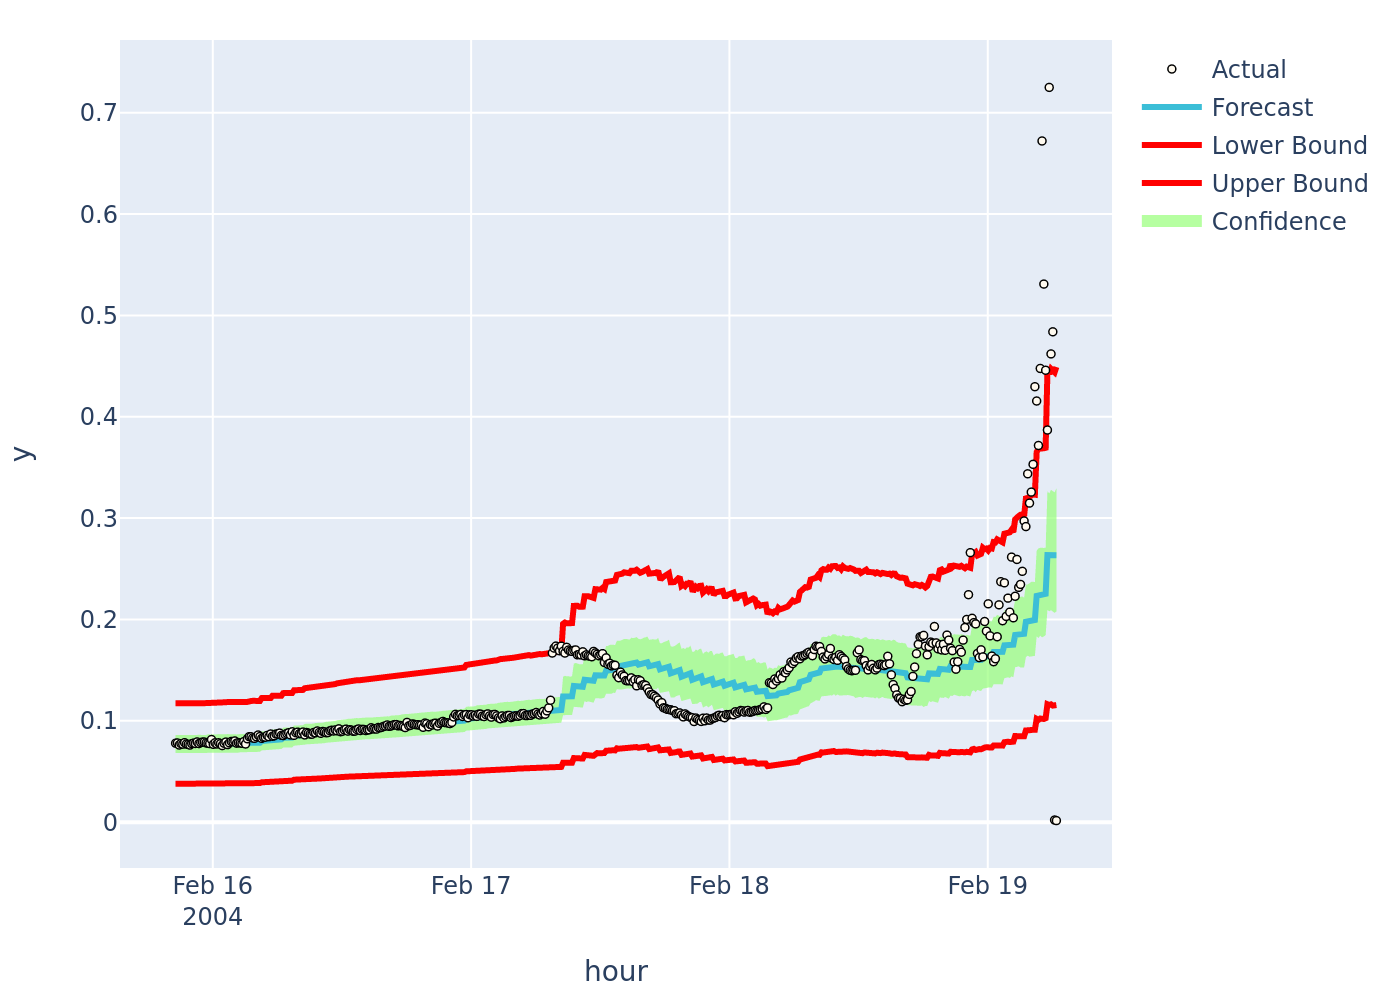

This graphic our final visualization. Actual is our test data(second half mentioned before). Confidence is yhat upper-lower part with %10 treshold
Forecast is our prediction value is coming from Prophet model . Upper and lower bounds are %50 tresholded limits for alarm detection.

                                                    
                                                    REFERENCES

https://facebook.github.io/prophet/

https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset?resource=download

https://www.kaggle.com/code/giuseppepanzutoynap/bearing

https://www.kaggle.com/code/furkancitil/nasa-bearing-dataset-supervised-learning

https://www.kaggle.com/code/yasirabd/rul-nasa-bearing-mean-rms-skewness-kurtosis